In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
from scipy.io.arff import loadarff 

raw_data = loadarff('data/2year.arff')
df = pd.DataFrame(raw_data[0])

In [4]:
df = df.dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4088 entries, 0 to 10172
Data columns (total 65 columns):
Attr1     4088 non-null float64
Attr2     4088 non-null float64
Attr3     4088 non-null float64
Attr4     4088 non-null float64
Attr5     4088 non-null float64
Attr6     4088 non-null float64
Attr7     4088 non-null float64
Attr8     4088 non-null float64
Attr9     4088 non-null float64
Attr10    4088 non-null float64
Attr11    4088 non-null float64
Attr12    4088 non-null float64
Attr13    4088 non-null float64
Attr14    4088 non-null float64
Attr15    4088 non-null float64
Attr16    4088 non-null float64
Attr17    4088 non-null float64
Attr18    4088 non-null float64
Attr19    4088 non-null float64
Attr20    4088 non-null float64
Attr21    4088 non-null float64
Attr22    4088 non-null float64
Attr23    4088 non-null float64
Attr24    4088 non-null float64
Attr25    4088 non-null float64
Attr26    4088 non-null float64
Attr27    4088 non-null float64
Attr28    4088 non-null floa

In [6]:
df['class'].value_counts()

b'0'    4015
b'1'      73
Name: class, dtype: int64

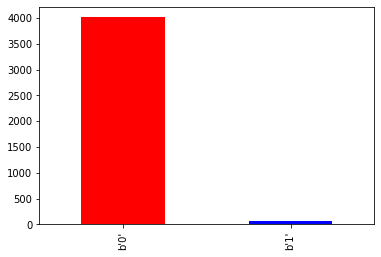

In [7]:
df['class'].value_counts().plot(kind='bar',color=('red','blue'));

In [8]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows 
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
df['class']= label_encoder.fit_transform(df['class']) 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4088 entries, 0 to 10172
Data columns (total 65 columns):
Attr1     4088 non-null float64
Attr2     4088 non-null float64
Attr3     4088 non-null float64
Attr4     4088 non-null float64
Attr5     4088 non-null float64
Attr6     4088 non-null float64
Attr7     4088 non-null float64
Attr8     4088 non-null float64
Attr9     4088 non-null float64
Attr10    4088 non-null float64
Attr11    4088 non-null float64
Attr12    4088 non-null float64
Attr13    4088 non-null float64
Attr14    4088 non-null float64
Attr15    4088 non-null float64
Attr16    4088 non-null float64
Attr17    4088 non-null float64
Attr18    4088 non-null float64
Attr19    4088 non-null float64
Attr20    4088 non-null float64
Attr21    4088 non-null float64
Attr22    4088 non-null float64
Attr23    4088 non-null float64
Attr24    4088 non-null float64
Attr25    4088 non-null float64
Attr26    4088 non-null float64
Attr27    4088 non-null float64
Attr28    4088 non-null floa

In [10]:
df.columns

Index(['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8',
       'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15',
       'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22',
       'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29',
       'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36',
       'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43',
       'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50',
       'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57',
       'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64',
       'class'],
      dtype='object')

# Feature Selection

In [11]:
X = df[['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8',
       'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15',
       'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22',
       'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29',
       'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36',
       'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43',
       'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50',
       'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57',
       'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64',]]
y = df['class']

# With Selected Features

In [12]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif

selector = SelectPercentile(mutual_info_classif, percentile=20)
X_reduced = selector.fit_transform(X, y)
X_reduced.shape


(4088, 13)

In [13]:
cols = selector.get_support(indices=True)
selected_columns = X.iloc[:,cols].columns.tolist()
selected_columns

['Attr2',
 'Attr8',
 'Attr9',
 'Attr10',
 'Attr15',
 'Attr16',
 'Attr17',
 'Attr22',
 'Attr26',
 'Attr27',
 'Attr34',
 'Attr46',
 'Attr64']

In [14]:
df = df[['Attr2',
 'Attr8',
 'Attr9',
 'Attr10',
 'Attr15',
 'Attr16',
 'Attr17',
 'Attr22',
 'Attr26',
 'Attr27',
 'Attr34',
 'Attr46',
 'Attr64',
         'class']]
df.to_csv('process.csv')

In [15]:
from sklearn.model_selection import train_test_split
# splitting the dataset 80% for training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_reduced,y, test_size=0.20, random_state=42)

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [18]:
from imblearn.metrics import specificity_score,sensitivity_score

In [19]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []
roc = []
spec = []
sens = []

#function to call for storing the results
def storeResults(model, a,b,c,d,e,f,g):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))
    roc.append(round(e, 3))
    spec.append(round(f, 3))
    sens.append(round(g, 3))

# With The optimal hyperparameter using GA.

# Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,max_depth=1)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

rf_acc = accuracy_score(y_pred, y_test)
rf_prec = precision_score(y_pred, y_test,average='weighted')
rf_rec = recall_score(y_pred, y_test,average='weighted')
rf_f1 = f1_score(y_pred, y_test,average='weighted')
rf_roc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
rf_spec = specificity_score(y_pred, y_test,average='weighted')
rf_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [21]:
storeResults('RF- Opt by GA',rf_acc,rf_prec,rf_rec,rf_f1,rf_roc,rf_spec,rf_sens)

# SVM

In [22]:
from sklearn.svm import SVC

clf = SVC(probability=True,kernel='linear',C=10.0,gamma=0.1)
# fit the model   
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

svc_acc = accuracy_score(y_pred, y_test)
svc_prec = precision_score(y_pred, y_test)
svc_rec = recall_score(y_pred, y_test)
svc_f1 = f1_score(y_pred, y_test)
svc_roc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
svc_spec = specificity_score(y_pred, y_test,average='weighted')
svc_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [23]:
storeResults('SVM - Opt by GA',svc_acc,svc_prec,svc_rec,svc_f1,svc_roc,svc_spec,svc_sens)

# XGBoost

In [24]:
from xgboost import XGBClassifier

clf = XGBClassifier(learning_rate=0.1,gamma=1)
# fit the model   
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

xgb_acc = accuracy_score(y_pred, y_test)
xgb_prec = precision_score(y_pred, y_test)
xgb_rec = recall_score(y_pred, y_test)
xgb_f1 = f1_score(y_pred, y_test)
xgb_roc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
xgb_spec = specificity_score(y_pred, y_test,average='weighted')
xgb_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [25]:
storeResults('XGB - Opt by GA',xgb_acc,xgb_prec,xgb_rec,xgb_f1,xgb_roc,xgb_spec,xgb_sens)

# ANN - MLP

In [26]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes=(50,),activation='relu',learning_rate='adaptive')
ann.fit(X_train, y_train) 
y_pred = ann.predict(X_test)

ann_acc = accuracy_score(y_test, y_pred)
ann_prec = precision_score(y_test, y_pred,average='weighted')
ann_rec = recall_score(y_test, y_pred,average='weighted')
ann_f1 = f1_score(y_test, y_pred,average='weighted')
ann_roc = roc_auc_score(y_test, ann.predict_proba(X_test)[:, 1])
ann_spec = specificity_score(y_pred, y_test,average='weighted')
ann_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [27]:
storeResults('ANN - Opt by GA',ann_acc,ann_prec,ann_rec,ann_f1,ann_roc,ann_spec,ann_sens)

# Hybird Model

In [28]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

In [30]:
hclf = VotingClassifier(estimators=[('xgb', clf), ('ann', ann)], voting='soft')
hclf.fit(X_train, y_train)
y_pred = hclf.predict(X_test)

hy_acc = accuracy_score(y_pred, y_test)
hy_prec = precision_score(y_pred, y_test,average='weighted')
hy_rec = recall_score(y_pred, y_test,average='weighted')
hy_f1 = f1_score(y_pred, y_test,average='weighted')
hy_roc = roc_auc_score(y_test, hclf.predict_proba(X_test)[:, 1])
hy_spec = specificity_score(y_pred, y_test,average='weighted')
hy_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [31]:
storeResults('Hybrid Model - Opt by GA',hy_acc,hy_prec,hy_rec,hy_f1,hy_roc,hy_spec,hy_sens)

# Voting Classifier

In [34]:
from sklearn.ensemble import BaggingClassifier

clf1 = BaggingClassifier(RandomForestClassifier(),n_estimators=10, random_state=0)
clf2 = DecisionTreeClassifier(random_state=10)

eclf1 = VotingClassifier(estimators=[('bagging', clf1), ('dt', clf2)], voting='soft')
eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_test)

vot_acc = accuracy_score(y_pred, y_test)
vot_prec = precision_score(y_pred, y_test,average='weighted')
vot_rec = recall_score(y_pred, y_test,average='weighted')
vot_f1 = f1_score(y_pred, y_test,average='weighted')
vot_roc = roc_auc_score(y_test, eclf1.predict_proba(X_test)[:, 1])
vot_spec = specificity_score(y_pred, y_test,average='weighted')
vot_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [35]:
storeResults('Voting Classifier - Opt by GA',vot_acc,vot_prec,vot_rec,vot_f1,vot_roc,vot_spec,vot_sens)

# With The optimal hyperparameter using PSO.

# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=40,max_depth=14)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

rf1_acc = accuracy_score(y_pred, y_test)
rf1_prec = precision_score(y_pred, y_test,average='weighted')
rf1_rec = recall_score(y_pred, y_test,average='weighted')
rf1_f1 = f1_score(y_pred, y_test,average='weighted')
rf1_roc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
rf1_spec = specificity_score(y_pred, y_test,average='weighted')
rf1_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [37]:
storeResults('RF - Opt by PSO',rf1_acc,rf1_prec,rf1_rec,rf1_f1,rf1_roc,rf1_spec,rf1_sens)

# SVM

In [38]:
from sklearn.svm import SVC

clf = SVC(probability=True,kernel='linear',C=9.825,gamma=0.084)
# fit the model   
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

svc1_acc = accuracy_score(y_pred, y_test)
svc1_prec = precision_score(y_pred, y_test)
svc1_rec = recall_score(y_pred, y_test)
svc1_f1 = f1_score(y_pred, y_test)
svc1_roc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
svc1_spec = specificity_score(y_pred, y_test,average='weighted')
svc1_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [39]:
storeResults('SVC - Opt by PSO',svc1_acc,svc1_prec,svc1_rec,svc1_f1,svc1_roc,svc1_spec,svc1_sens)

# XGBoost

In [40]:
clf = XGBClassifier(learning_rate=1.0,gamma=0.001)
# fit the model   
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

xgb1_acc = accuracy_score(y_pred, y_test)
xgb1_prec = precision_score(y_pred, y_test)
xgb1_rec = recall_score(y_pred, y_test)
xgb1_f1 = f1_score(y_pred, y_test)
xgb1_roc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
xgb1_spec = specificity_score(y_pred, y_test,average='weighted')
xgb1_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [41]:
storeResults('XGB - Opt by PSO',xgb1_acc,xgb1_prec,xgb1_rec,xgb1_f1,xgb1_roc,xgb1_spec,xgb_sens)

# ANN - MLP

In [42]:
ann = MLPClassifier(hidden_layer_sizes=(38,),activation='tanh',learning_rate='constant')
ann.fit(X_train, y_train) 
y_pred = ann.predict(X_test)

ann1_acc = accuracy_score(y_test, y_pred)
ann1_prec = precision_score(y_test, y_pred,average='weighted')
ann1_rec = recall_score(y_test, y_pred,average='weighted')
ann1_f1 = f1_score(y_test, y_pred,average='weighted')
ann1_roc = roc_auc_score(y_test, ann.predict_proba(X_test)[:, 1])
ann1_spec = specificity_score(y_pred, y_test,average='weighted')
ann1_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [43]:
storeResults('ANN - Opt by PSO',ann1_acc,ann1_prec,ann1_rec,ann1_f1,ann1_roc,ann1_spec,ann1_sens)

# Hybrid Model

In [44]:
hclf1 = VotingClassifier(estimators=[('xgb', clf), ('ann', ann)], voting='soft')
hclf1.fit(X_train, y_train)
y_pred = hclf1.predict(X_test)

hy1_acc = accuracy_score(y_pred, y_test)
hy1_prec = precision_score(y_pred, y_test,average='weighted')
hy1_rec = recall_score(y_pred, y_test,average='weighted')
hy1_f1 = f1_score(y_pred, y_test,average='weighted')
hy1_roc = roc_auc_score(y_test, hclf.predict_proba(X_test)[:, 1])
hy1_spec = specificity_score(y_pred, y_test,average='weighted')
hy1_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [45]:
storeResults('Hybrid Model - Opt by PSO',hy1_acc,hy1_prec,hy1_rec,hy1_f1,hy1_roc,hy1_spec,hy1_sens)

# Voting Classifier

In [46]:
clf1 = BaggingClassifier(RandomForestClassifier(),n_estimators=10, random_state=0)
clf2 = DecisionTreeClassifier(random_state=10)

eclf2 = VotingClassifier(estimators=[('bagging', clf1), ('dt', clf2)], voting='soft')
eclf2.fit(X_train, y_train)
y_pred = eclf2.predict(X_test)

vot1_acc = accuracy_score(y_pred, y_test)
vot1_prec = precision_score(y_pred, y_test,average='weighted')
vot1_rec = recall_score(y_pred, y_test,average='weighted')
vot1_f1 = f1_score(y_pred, y_test,average='weighted')
vot1_roc = roc_auc_score(y_test, eclf1.predict_proba(X_test)[:, 1])
vot1_spec = specificity_score(y_pred, y_test,average='weighted')
vot1_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [47]:
storeResults('Voting Classifier - Opt by PSO',vot1_acc,vot1_prec,vot1_rec,vot1_f1,vot1_roc,vot1_spec, vot1_sens)

# Comparison

In [48]:
#creating dataframe
import pandas as pd
import numpy as np
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1score,
                        'Recall'   : recall,
                        'Precision': precision,
                        'AUC' : roc,
                        'Specificity' : spec,
                        'Sensitivity' : sens
                      })

In [49]:
result

,ML Model,Accuracy,f1_score,Recall,Precision,AUC,Specificity,Sensitivity
0,RF- Opt by GA,0.980,0.990,0.980,1.000,0.831,0.000,0.980
1,SVM - Opt by GA,0.980,0.000,0.000,0.000,0.376,0.000,0.980
2,XGB - Opt by GA,0.980,0.000,0.000,0.000,0.834,0.000,0.980
3,ANN - Opt by GA,0.980,0.971,0.980,0.961,0.249,0.000,0.980
4,Hybrid Model - Opt by GA,0.980,0.990,0.980,1.000,0.700,0.000,0.980
5,Voting Classifier - Opt by GA,1.000,1.000,1.000,1.000,1.000,1.000,1.000
6,RF - Opt by PSO,0.979,0.988,0.979,0.998,0.766,0.001,0.979
7,SVC - Opt by PSO,0.980,0.000,0.000,0.000,0.376,0.000,0.980
8,XGB - Opt by PSO,0.977,0.000,0.000,0.000,0.826,0.004,0.980
9,ANN - Opt by PSO,0.980,0.971,0.980,0.961,0.579,0.000,0.980


# Modelling

In [50]:
import joblib
filename1 = 'model_ga.sav'
filename2 = 'model_pso.sav'
joblib.dump(eclf1, filename1)
joblib.dump(eclf2, filename2)

['model_pso.sav']

# Graph

In [52]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

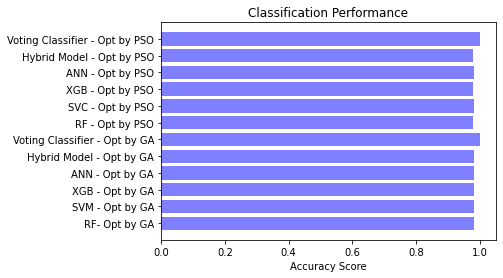

In [53]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

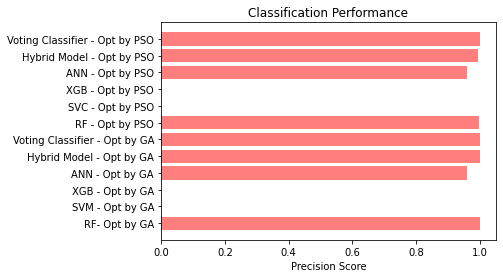

In [54]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

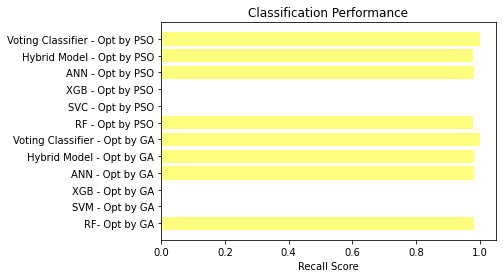

In [55]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1-Score

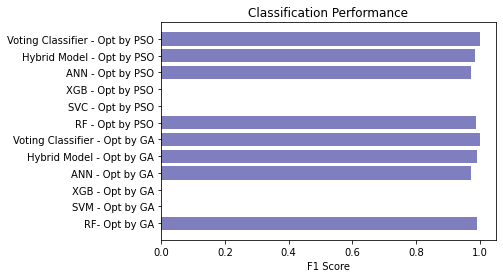

In [56]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# AUC

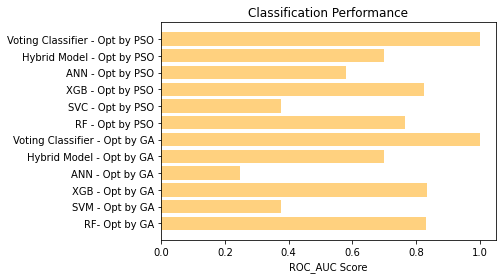

In [57]:
plt2.barh(y_pos, roc, align='center', alpha=0.5,color='orange')
plt2.yticks(y_pos, classifier)
plt2.xlabel('ROC_AUC Score')
plt2.title('Classification Performance')
plt2.show()

# Sensitivity

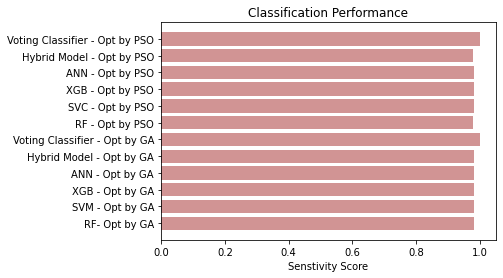

In [58]:
plt2.barh(y_pos, sens, align='center', alpha=0.5,color='brown')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Senstivity Score')
plt2.title('Classification Performance')
plt2.show()

# With All Feature

In [60]:
from scipy.io.arff import loadarff 

raw_data = loadarff('data/2year.arff')
df = pd.DataFrame(raw_data[0])

In [61]:
df = df.dropna()

In [62]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows 
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
df['class']= label_encoder.fit_transform(df['class']) 

In [63]:
X = df[['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8',
       'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15',
       'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22',
       'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29',
       'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36',
       'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43',
       'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50',
       'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57',
       'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64',]]
y = df['class']

In [64]:
from sklearn.model_selection import train_test_split
# splitting the dataset 80% for training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_reduced,y, test_size=0.20, random_state=42)

In [87]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []
roc = []
spec = []
sens = []

#function to call for storing the results
def storeResults(model, a,b,c,d,e,f,g):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))
    roc.append(round(e, 3))
    spec.append(round(f, 3))
    sens.append(round(g, 3))

# With The optimal hyperparameter using GA.

# Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,max_depth=1)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

rf_acc = accuracy_score(y_pred, y_test)
rf_prec = precision_score(y_pred, y_test,average='weighted')
rf_rec = recall_score(y_pred, y_test,average='weighted')
rf_f1 = f1_score(y_pred, y_test,average='weighted')
rf_roc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
rf_spec = specificity_score(y_pred, y_test,average='weighted')
rf_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [88]:
storeResults('RF- Opt by GA',rf_acc,rf_prec,rf_rec,rf_f1,rf_roc,rf_spec,rf_sens)

# SVM

In [67]:
from sklearn.svm import SVC

clf = SVC(probability=True,kernel='linear',C=10.0,gamma=0.1)
# fit the model   
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

svc_acc = accuracy_score(y_pred, y_test)
svc_prec = precision_score(y_pred, y_test)
svc_rec = recall_score(y_pred, y_test)
svc_f1 = f1_score(y_pred, y_test)
svc_roc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
svc_spec = specificity_score(y_pred, y_test,average='weighted')
svc_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [89]:
storeResults('SVM - Opt by GA',svc_acc,svc_prec,svc_rec,svc_f1,svc_roc,svc_spec,svc_sens)

# XGBoost

In [69]:
from xgboost import XGBClassifier

clf = XGBClassifier(learning_rate=0.1,gamma=1)
# fit the model   
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

xgb_acc = accuracy_score(y_pred, y_test)
xgb_prec = precision_score(y_pred, y_test)
xgb_rec = recall_score(y_pred, y_test)
xgb_f1 = f1_score(y_pred, y_test)
xgb_roc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
xgb_spec = specificity_score(y_pred, y_test,average='weighted')
xgb_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [90]:
storeResults('XGB - Opt by GA',xgb_acc,xgb_prec,xgb_rec,xgb_f1,xgb_roc,xgb_spec,xgb_sens)

# ANN-MLP

In [71]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes=(50,),activation='relu',learning_rate='adaptive')
ann.fit(X_train, y_train) 
y_pred = ann.predict(X_test)

ann_acc = accuracy_score(y_test, y_pred)
ann_prec = precision_score(y_test, y_pred,average='weighted')
ann_rec = recall_score(y_test, y_pred,average='weighted')
ann_f1 = f1_score(y_test, y_pred,average='weighted')
ann_roc = roc_auc_score(y_test, ann.predict_proba(X_test)[:, 1])
ann_spec = specificity_score(y_pred, y_test,average='weighted')
ann_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [91]:
storeResults('ANN - Opt by GA',ann_acc,ann_prec,ann_rec,ann_f1,ann_roc,ann_spec,ann_sens)

# Hybird Model

In [73]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

In [74]:
hclf = VotingClassifier(estimators=[('xgb', clf), ('ann', ann)], voting='soft')
hclf.fit(X_train, y_train)
y_pred = hclf.predict(X_test)

hy_acc = accuracy_score(y_pred, y_test)
hy_prec = precision_score(y_pred, y_test,average='weighted')
hy_rec = recall_score(y_pred, y_test,average='weighted')
hy_f1 = f1_score(y_pred, y_test,average='weighted')
hy_roc = roc_auc_score(y_test, hclf.predict_proba(X_test)[:, 1])
hy_spec = specificity_score(y_pred, y_test,average='weighted')
hy_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [92]:
storeResults('Hybrid Model - Opt by GA',hy_acc,hy_prec,hy_rec,hy_f1,hy_roc,hy_spec,hy_sens)

# Voting Classifier

In [76]:
from sklearn.ensemble import BaggingClassifier

clf1 = BaggingClassifier(RandomForestClassifier(),n_estimators=10, random_state=0)
clf2 = DecisionTreeClassifier(random_state=10)

eclf1 = VotingClassifier(estimators=[('bagging', clf1), ('dt', clf2)], voting='soft')
eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_test)

vot_acc = accuracy_score(y_pred, y_test)
vot_prec = precision_score(y_pred, y_test,average='weighted')
vot_rec = recall_score(y_pred, y_test,average='weighted')
vot_f1 = f1_score(y_pred, y_test,average='weighted')
vot_roc = roc_auc_score(y_test, eclf1.predict_proba(X_test)[:, 1])
vot_spec = specificity_score(y_pred, y_test,average='weighted')
vot_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [93]:
storeResults('Voting Classifier - Opt by GA',vot_acc,vot_prec,vot_rec,vot_f1,vot_roc,vot_spec,vot_sens)

# With The optimal hyperparameter using PSO.

# Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=40,max_depth=14)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

rf1_acc = accuracy_score(y_pred, y_test)
rf1_prec = precision_score(y_pred, y_test,average='weighted')
rf1_rec = recall_score(y_pred, y_test,average='weighted')
rf1_f1 = f1_score(y_pred, y_test,average='weighted')
rf1_roc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
rf1_spec = specificity_score(y_pred, y_test,average='weighted')
rf1_sens = sensitivity_score(y_pred, y_test,average='weighted')

storeResults('RF - Opt by PSO',rf1_acc,rf1_prec,rf1_rec,rf1_f1,rf1_roc,rf1_spec,rf1_sens)

# SVM

In [95]:
from sklearn.svm import SVC

clf = SVC(probability=True,kernel='linear',C=9.825,gamma=0.084)
# fit the model   
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

svc1_acc = accuracy_score(y_pred, y_test)
svc1_prec = precision_score(y_pred, y_test)
svc1_rec = recall_score(y_pred, y_test)
svc1_f1 = f1_score(y_pred, y_test)
svc1_roc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
svc1_spec = specificity_score(y_pred, y_test,average='weighted')
svc1_sens = sensitivity_score(y_pred, y_test,average='weighted')

storeResults('SVC - Opt by PSO',svc1_acc,svc1_prec,svc1_rec,svc1_f1,svc1_roc,svc1_spec,svc1_sens)

# XGBoost

In [80]:
clf = XGBClassifier(learning_rate=1.0,gamma=0.001)
# fit the model   
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

xgb1_acc = accuracy_score(y_pred, y_test)
xgb1_prec = precision_score(y_pred, y_test)
xgb1_rec = recall_score(y_pred, y_test)
xgb1_f1 = f1_score(y_pred, y_test)
xgb1_roc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
xgb1_spec = specificity_score(y_pred, y_test,average='weighted')
xgb1_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [96]:
storeResults('XGB - Opt by PSO',xgb1_acc,xgb1_prec,xgb1_rec,xgb1_f1,xgb1_roc,xgb1_spec,xgb_sens)

# ANN-MLP

In [97]:
ann = MLPClassifier(hidden_layer_sizes=(38,),activation='tanh',learning_rate='constant')
ann.fit(X_train, y_train) 
y_pred = ann.predict(X_test)

ann1_acc = accuracy_score(y_test, y_pred)
ann1_prec = precision_score(y_test, y_pred,average='weighted')
ann1_rec = recall_score(y_test, y_pred,average='weighted')
ann1_f1 = f1_score(y_test, y_pred,average='weighted')
ann1_roc = roc_auc_score(y_test, ann.predict_proba(X_test)[:, 1])
ann1_spec = specificity_score(y_pred, y_test,average='weighted')
ann1_sens = sensitivity_score(y_pred, y_test,average='weighted')

storeResults('ANN - Opt by PSO',ann1_acc,ann1_prec,ann1_rec,ann1_f1,ann1_roc,ann1_spec,ann1_sens)

# Hybrid Model

In [98]:
hclf1 = VotingClassifier(estimators=[('xgb', clf), ('ann', ann)], voting='soft')
hclf1.fit(X_train, y_train)
y_pred = hclf1.predict(X_test)

hy1_acc = accuracy_score(y_pred, y_test)
hy1_prec = precision_score(y_pred, y_test,average='weighted')
hy1_rec = recall_score(y_pred, y_test,average='weighted')
hy1_f1 = f1_score(y_pred, y_test,average='weighted')
hy1_roc = roc_auc_score(y_test, hclf.predict_proba(X_test)[:, 1])
hy1_spec = specificity_score(y_pred, y_test,average='weighted')
hy1_sens = sensitivity_score(y_pred, y_test,average='weighted')

storeResults('Hybrid Model - Opt by PSO',hy1_acc,hy1_prec,hy1_rec,hy1_f1,hy1_roc,hy1_spec,hy1_sens)

# Voting Classifier

In [99]:
clf1 = BaggingClassifier(RandomForestClassifier(),n_estimators=10, random_state=0)
clf2 = DecisionTreeClassifier(random_state=10)

eclf2 = VotingClassifier(estimators=[('bagging', clf1), ('dt', clf2)], voting='soft')
eclf2.fit(X_train, y_train)
y_pred = eclf2.predict(X_test)

vot1_acc = accuracy_score(y_pred, y_test)
vot1_prec = precision_score(y_pred, y_test,average='weighted')
vot1_rec = recall_score(y_pred, y_test,average='weighted')
vot1_f1 = f1_score(y_pred, y_test,average='weighted')
vot1_roc = roc_auc_score(y_test, eclf1.predict_proba(X_test)[:, 1])
vot1_spec = specificity_score(y_pred, y_test,average='weighted')
vot1_sens = sensitivity_score(y_pred, y_test,average='weighted')

storeResults('Voting Classifier - Opt by PSO',vot1_acc,vot1_prec,vot1_rec,vot1_f1,vot1_roc,vot1_spec, vot1_sens)

# Comparison

In [100]:
#creating dataframe
import pandas as pd
import numpy as np
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1score,
                        'Recall'   : recall,
                        'Precision': precision,
                        'AUC' : roc,
                        'Specificity' : spec,
                        'Sensitivity' : sens
                      })

In [101]:
result

,ML Model,Accuracy,f1_score,Recall,Precision,AUC,Specificity,Sensitivity
0,RF- Opt by GA,0.980,0.990,0.980,1.000,0.813,0.000,0.980
1,SVM - Opt by GA,0.980,0.000,0.000,0.000,0.624,0.000,0.980
2,XGB - Opt by GA,0.980,0.000,0.000,0.000,0.834,0.000,0.980
3,ANN - Opt by GA,0.980,0.973,0.980,0.972,0.284,0.501,0.980
4,Hybrid Model - Opt by GA,0.980,0.990,0.980,1.000,0.784,0.000,0.980
5,Voting Classifier - Opt by GA,0.962,0.962,0.962,0.961,0.821,0.078,0.962
6,RF - Opt by PSO,0.980,0.990,0.980,1.000,0.874,0.000,0.980
7,SVC - Opt by PSO,0.980,0.000,0.000,0.000,0.376,0.000,0.980
8,XGB - Opt by PSO,0.977,0.000,0.000,0.000,0.826,0.004,0.980
9,ANN - Opt by PSO,0.956,0.958,0.956,0.961,0.600,0.024,0.956


# Graph

In [102]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

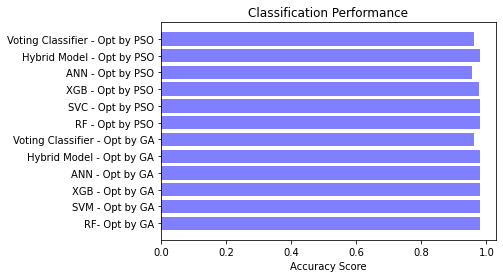

In [103]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

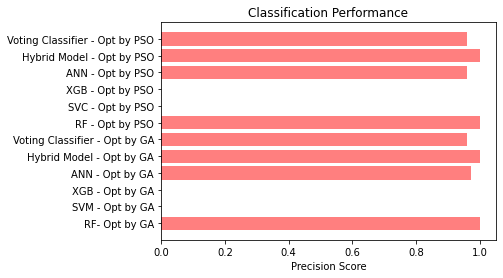

In [104]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

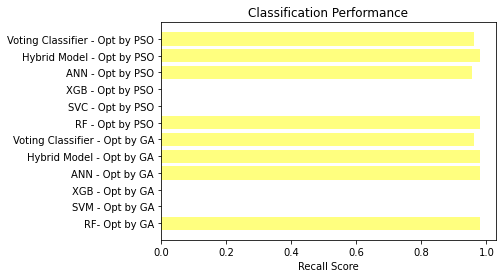

In [105]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

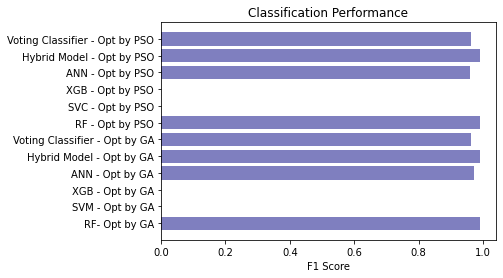

In [106]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# AUC

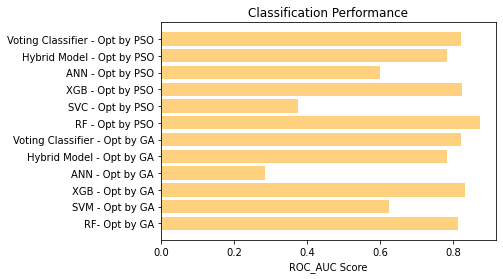

In [107]:
plt2.barh(y_pos, roc, align='center', alpha=0.5,color='orange')
plt2.yticks(y_pos, classifier)
plt2.xlabel('ROC_AUC Score')
plt2.title('Classification Performance')
plt2.show()

# Sensitivity

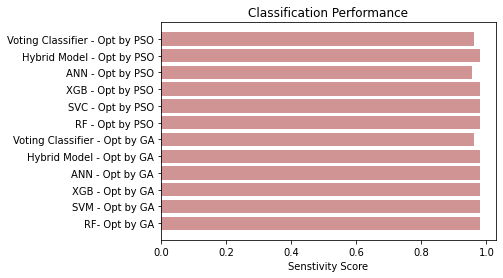

In [108]:
plt2.barh(y_pos, sens, align='center', alpha=0.5,color='brown')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Senstivity Score')
plt2.title('Classification Performance')
plt2.show()